# Metadata

```yaml
Course:  DS 5100
Module:  06 Pandas
Topic:   HW Myocardial Infarction Analytics with Pandas
Author:  R.C. Alvarado (adapted)
Date:    7 July 2023
```

# Student Info

* Name:  Efrain Olivares
* Net UD: dpy8wq
* URL of this file in GitHub: https://github.com/Niarfe/DS5100-dpy8wq/blob/main/lessons/M06/M06-HW-1-1.ipynb

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the data file described to write code that performs the tasks below. 

Save your notebook in the `M06` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 12**


# Overview

In this homework, you will be working with the Myocardial Infarction (MI) Complications Data Set housed at UCI. 

A myocardial infarction is commonly called a heart attack. 

You may Read about the dataset in the [Data Description File (DDF)](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#).

You will work with some of the columns (aka features). 

A subset of these could be predictors in an ML model, while others could be outcome variables. 

The section **Attribute Information** in the DDF provides details.

# Setting Up

In [1]:
import pandas as pd
import numpy as np

# Prepare the Data 

Read in the dataset from the UCI Machine Learning Repository.

Use Pandas' `read_csv()` function, giving the path to the dataset as an argument.  

There is no header in this data, so pass a second argument `header=None`.

In [2]:
path_to_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data"

## Task 1

(1 PT)

Import the data into a datafram and then print the number of records in the dataset

In [3]:
# CODE HERE
df = pd.read_csv(path_to_data, header=None)

In [4]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, 0 to 123
dtypes: int64(14), object(110)
memory usage: 1.6+ MB


1700

## Task 2

(1 PT)

Show the first three records in the dataset</span>

In [5]:
# CODE HERE
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0


# Working with AGE

The second column contains patient age. 

If your dataframe is named `df`, you can reference the column with: `df[1]`.

Generally the field names will be strings and you can use `df['age']` to access field `age`, as an example).

## Task 3

(1 PT)

One complication: missing values are filled with `?` which will cause problems (e.g., stats can't be computed easily). 

Count the number of records in `df[1]` containing `?`.

In [6]:
# CODE HERE
len(df[(df[1] == '?')])

8

## Task 4 

(1 PT)

Replace `'?'` with `np.nan` in the age column.

In [7]:
# CODE HERE
df[1] = df[1].replace('?', np.nan)

## Task 5

(1 PT)

Print the number of records containing `np.nan` in the column `df[1]` of your dataframe.

In [9]:
# CODE HERE
sum(pd.isnull(df[1]))

8

# Another complication

Another complication: the age data is saved as strings, and there are the null values. 

Here's an example:

```python
# inspect first element
df[1].iloc[0]

'77'
```

```python
# check the column type
df[1].dtype

dtype('O')

```

To convert the column to numeric, we can use `apply()` with a lambda function.  

If the type is string, we cast to numeric, e.g. `float` or `int`, otherwise it's null and we leave things alone.  

`isinstance(x, str)` checks if `x` is a string, returning a bool.  

Review this code for understanding:

```python
df[1] = df[1].apply(lambda x: float(x) if isinstance(x, str) else x)
```

# Task 6

(1 PT)

Run the lambda function above, then show the data type of `age` is no longer string type.

In [10]:
# CODE HERE
df[1] = df[1].apply(lambda x: float(x) if isinstance(x, str) else x)
df[1].dtype

dtype('float64')

# Task 7

(1 PT)

Compute the median age.

In [36]:
# CODE HERE
float(df[1].median())

63.0

# Working with GENDER

The third column contains patient gender.

Again, since indexing starts at zero, you'll reference `df[2]`.

# Task 8

(1 PT)

Print the frequency AND percentage of each gender.

Hint: The function you'll use to compute frequencies will take an argument to compute normalized values, which may be converted to percentages.

In [56]:
# CODE HERE
df[2].value_counts(normalize=True) * 100

2
1    62.647059
0    37.352941
Name: proportion, dtype: float64

# Working with Essential Hypertension (EH)

Reference this column with `df[8]`. 

# Task 9

(1 PT)

Enter the most frequent value.

In [16]:
# CODE HERE
df[8].mode()[0]

'2'

# Working with Atrial Fibrillation (AFIB)

Reference this column with `df[112]`.  

AFIB is one of the complications and outcomes of myocardial infarction.

# Task 10

(1 PT)

Print the number of AFIB cases. 

Note that 1 means there is a case.

In [19]:
# CODE HERE
len(df[112][(df[112] == 1)])

170

# Combining Age and AFIB

# Task 11

(1 PT)

Construct a new dataframe `df2` containing only the columns for AGE and AFIB.

Recall that AGE is in `df[1]` and AFIB is in `df[112]`.

Print the shape of this dataframe.

Hint: you can pass a list of column names to the dataframe indexer to get a dataframe with a subset of columns.

In [29]:
# CODE HERE
age_afib = df[[1,112]]
age_afib.shape

(1700, 2)

# Plotting

We are going to plot AGE and AFIB, so renaming the columns to strings will make our visualization more readable.  

You can rename columns using the dataframe `.rename()` method, which takes a dictionary as an argument of the form:

```python
{
    current_column_name1: new_column_name1,
    ...
    current_column_nameN: new_column_nameN
}
```

Rename column `1` to  `'age'` and `2` to `'AFIB'` for `df2`.

In [32]:
# CODE HERE
age_afib = age_afib.rename({ 1: 'age', 112: 'AFIB'}, axis=1)
age_afib.head(3)

,age,AFIB
0,77.0,0
1,55.0,0
2,52.0,0


# Task 12

(1 PT)

Dispplay a boxplot with AFIB on the x-axis and Age on the y-axis</span> 

Use the the `boxplot()` function from the `seaborn` package for this.
            
Here is the [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html), but all you need to do is this:

```python
from seaborn import boxplot
```

<Axes: xlabel='age', ylabel='AFIB'>

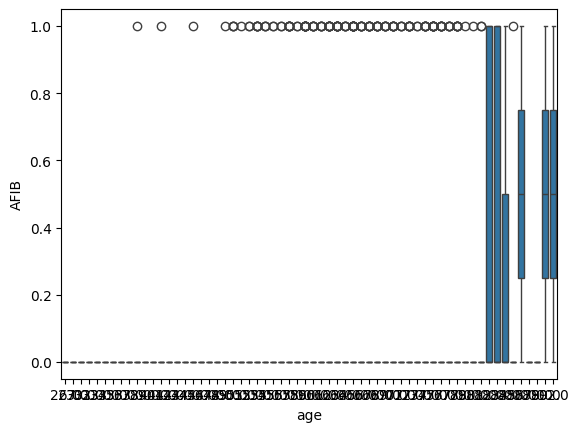

In [35]:
# CODE HERE
from seaborn import boxplot
boxplot(data=age_afib, x="age", y="AFIB")

Ungraded question: What do you notice about the difference in age distributions between AFIB and non-AFIB groups?